In [199]:
import numpy as np
from matplotlib import pyplot as plt

In [200]:
def compute_hypothesis(X, theta):
    return X @ theta

In [201]:
def compute_cost(X, y, theta):
    m = X.shape[0]  # количество примеров в выборке
    # ВАШ КОД ЗДЕСЬ
    return 1 / (2 * m) * sum((compute_hypothesis(X, theta) - y) ** 2)
    # ==============

In [202]:
def gradient_descend(X, y, theta, alpha, num_iter):
    history = list()
    m = X.shape[0]  # количество примеров в выборке
    n = X.shape[1]  # количество признаков с фиктивным
    for i in range(num_iter):
      # ВАШ КОД ЗДЕСЬ
        theta_temp = theta
        for col in range(n):
            theta_temp[col] = theta_temp[col] - alpha * (compute_hypothesis(X, theta) - y).dot(X[:, col]) / m
        theta = theta_temp
        # =====================

        history.append(compute_cost(X, y, theta))
    return history, theta

In [203]:
def scale_features(X):
    # ВАШ КОД ЗДЕСЬ
  for col in range(1, X.shape[1]):
    mean = np.mean(X[:, col])
    std = np.std(X[:, col])
    X[:, col] = (X[:,col] - mean) / std

  return X

In [204]:
def normal_equation(X, y):
    # ВАШ КОД ЗДЕСь
    return (np.linalg.pinv((X.T @ X))) @ X.T @ y

In [205]:
def load_data(data_file_path):
    with open(data_file_path) as input_file:
        X = list()
        y = list()
        for line in input_file:
            *row, label = map(float, line.split(','))
            X.append([1] + row)
            y.append(label)
        return np.array(X, float), np.array(y, float)

In [206]:
X, y = load_data('lab1data2.txt')

In [207]:
history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 23)

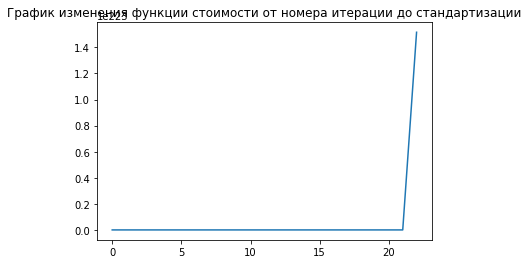

In [208]:
plt.title('График изменения функции стоимости от номера итерации до стандартизации')
plt.plot(range(len(history)), history)
plt.show()

In [209]:
X = scale_features(X)

In [210]:
history, theta = gradient_descend(X, y, np.array([0, 0, 0], float), 0.01, 2500)

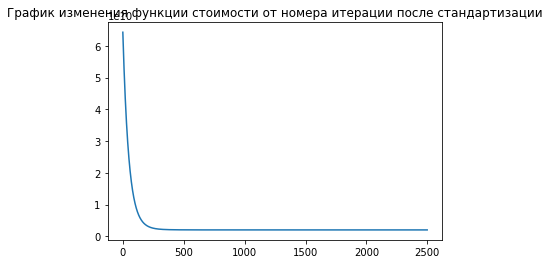

In [211]:
plt.title('График изменения функции стоимости от номера итерации после стандартизации')
plt.plot(range(len(history)), history)
plt.show()

In [212]:
theta_solution = normal_equation(X, y)
print(f'theta, посчитанные через градиентный спуск: {theta}, через нормальное уравнение: {theta_solution}')

theta, посчитанные через градиентный спуск: [340412.6595703  109446.88263067  -6577.44303366], через нормальное уравнение: [340412.65957447 109447.79646964  -6578.35485416]
